# Семинар 12: знакомство с PyTorch

## Вступление

В этом семинаре мы познакомимся с библиотекой **PyTorch**. Он очень похож на **NumPy**, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях.

### План семинара:

1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**
2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций
3. Работаем с градиентами руками
4. Моя первая нейросеть

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision

from sklearn.datasets import fetch_california_housing
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [ ]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.08428598, 0.92821468, 0.97421122],
       [0.03197542, 0.60097061, 0.80506296],
       [0.26397528, 0.63859169, 0.16601754],
       [0.54606807, 0.05652359, 0.94306515],
       [0.12068254, 0.55076051, 0.69352057]])

In [ ]:
# размеры массива
a.shape

(5, 3)

In [ ]:
# сложение
a + 5

array([[5.08428598, 5.92821468, 5.97421122],
       [5.03197542, 5.60097061, 5.80506296],
       [5.26397528, 5.63859169, 5.16601754],
       [5.54606807, 5.05652359, 5.94306515],
       [5.12068254, 5.55076051, 5.69352057]])

In [ ]:
# матричное умножение
a @ a.T

array([[1.81777412, 1.34482619, 0.77673575, 1.01723655, 1.19703135],
       [1.34482619, 1.01031447, 0.52587013, 0.81065659, 0.89317747],
       [0.77673575, 0.52587013, 0.50504412, 0.33680932, 0.49870487],
       [1.01723655, 0.81065659, 0.33680932, 1.19075712, 0.75106692],
       [1.19703135, 0.89317747, 0.49870487, 0.75106692, 0.79887219]])

In [ ]:
# среднее по колонкам
a.mean(axis=-1)

array([0.6622373 , 0.47933633, 0.35619484, 0.51521893, 0.45498787])

In [ ]:
# решейп
a.reshape(3, 5).shape

(3, 5)

#### Разминка

При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [ ]:
# YOUR CODE

np.square(np.arange(1, 10_000 + 1)).sum()

333383335000

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [ ]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.6954, 0.4823, 0.1850],
        [0.6041, 0.6640, 0.6522],
        [0.6727, 0.2173, 0.3276],
        [0.8150, 0.6603, 0.2622],
        [0.6467, 0.8387, 0.0112]])

In [ ]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [ ]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [ ]:
# сложение
x + 5

tensor([[5.6954, 5.4823, 5.1850],
        [5.6041, 5.6640, 5.6522],
        [5.6727, 5.2173, 5.3276],
        [5.8150, 5.6603, 5.2622],
        [5.6467, 5.8387, 5.0112]])

In [ ]:
# матричное умножение
# читайте документации по различным вариантам: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[0.7505, 0.8611, 0.6332, 0.9338, 0.8564],
        [0.8611, 1.2313, 0.7643, 1.1018, 0.9549],
        [0.6332, 0.7643, 0.6070, 0.7776, 0.6210],
        [0.9338, 1.1018, 0.7776, 1.1690, 1.0838],
        [0.8564, 0.9549, 0.6210, 1.0838, 1.1218]])

In [ ]:
# очередное матричное умножение
x.mm(x.t())

tensor([[0.7505, 0.8611, 0.6332, 0.9338, 0.8564],
        [0.8611, 1.2313, 0.7643, 1.1018, 0.9549],
        [0.6332, 0.7643, 0.6070, 0.7776, 0.6210],
        [0.9338, 1.1018, 0.7776, 1.1690, 1.0838],
        [0.8564, 0.9549, 0.6210, 1.0838, 1.1218]])

In [ ]:
# поэлементное умножение
x * x

tensor([[4.8361e-01, 2.3265e-01, 3.4238e-02],
        [3.6494e-01, 4.4092e-01, 4.2543e-01],
        [4.5252e-01, 4.7218e-02, 1.0729e-01],
        [6.6426e-01, 4.3597e-01, 6.8741e-02],
        [4.1825e-01, 7.0345e-01, 1.2588e-04]])

In [ ]:
# среднее по колонкам
x.mean(dim=-1)

tensor([0.4543, 0.6401, 0.4059, 0.5792, 0.4989])

In [ ]:
# решейп
x.view([3, 5]).shape

torch.Size([3, 5])

In [ ]:
# или так
x.reshape([3, 5]).shape

torch.Size([3, 5])

In [ ]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [ ]:
# YOUR CODE

# .item() возвращает число из тензора.
# Без этого будет тензор размерности 1x1

torch.square(torch.arange(1, 10_000 + 1)).sum().item()

333383335000

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [ ]:
# пустой тензор
x = torch.empty(5, 3)
x

tensor([[ 0.0000e+00,  0.0000e+00, -4.1164e+25],
        [ 3.2577e-41, -5.1572e+23,  3.2577e-41],
        [-1.3763e-34,  4.4501e-41,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [ ]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.8137, 0.1925, 0.9093],
        [0.3627, 0.8893, 0.6633],
        [0.7459, 0.5154, 0.9331],
        [0.4068, 0.7964, 0.6724],
        [0.7503, 0.5641, 0.2739]])

In [ ]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [ ]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [ ]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[ 0.6698,  0.3936,  0.6711],
        [-1.2271, -0.3361, -0.1220],
        [-0.1167,  0.2910,  0.2916],
        [-0.0121, -0.0389,  1.5067],
        [-0.6614,  0.0921,  0.0292]])

In [ ]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [ ]:
x

tensor([[0.1574, 0.3000, 0.7052],
        [0.1297, 0.6742, 0.7760],
        [0.4453, 0.5285, 0.3013],
        [0.8391, 0.1213, 0.6633],
        [0.2783, 0.9018, 0.9814]])

In [ ]:
y

tensor([[0.3588, 0.3295, 0.3313],
        [0.5265, 0.6102, 0.7450],
        [0.5746, 0.6666, 0.4896],
        [0.6666, 0.3094, 0.1928],
        [0.0695, 0.5998, 0.5261]])

In [ ]:
# сложение
x + y

tensor([[0.5163, 0.6296, 1.0365],
        [0.6562, 1.2844, 1.5209],
        [1.0198, 1.1950, 0.7910],
        [1.5057, 0.4307, 0.8561],
        [0.3478, 1.5015, 1.5075]])

In [ ]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[0.5163, 0.6296, 1.0365],
        [0.6562, 1.2844, 1.5209],
        [1.0198, 1.1950, 0.7910],
        [1.5057, 0.4307, 0.8561],
        [0.3478, 1.5015, 1.5075]])

In [ ]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x)
x

tensor([[0.5163, 0.6296, 1.0365],
        [0.6562, 1.2844, 1.5209],
        [1.0198, 1.1950, 0.7910],
        [1.5057, 0.4307, 0.8561],
        [0.3478, 1.5015, 1.5075]])

In [ ]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [ ]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [ ]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [ ]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [ ]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [ ]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [ ]:
np.allclose(x[:, 1], a[:, 1])

True

In [ ]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [ ]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

[California](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html)

X: MedInc (median income in block group).

y: the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

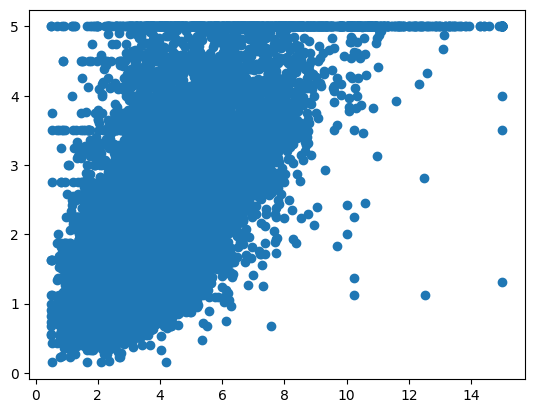

In [ ]:
housing = fetch_california_housing()
plt.scatter(housing.data[:, 0], housing.target);

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

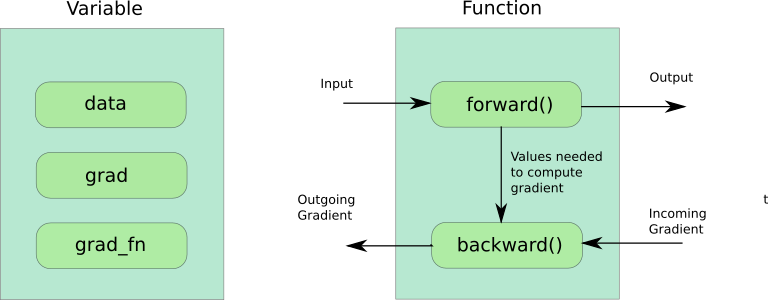

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [ ]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(housing.data[:, 0] / housing.data[:, 0].max(), dtype=torch.float32)
y = torch.tensor(housing.target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [ ]:
x.size(), y.size()

(torch.Size([20640]), torch.Size([20640]))

In [ ]:
y_pred = w * x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()

In [ ]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-0.9962])
dL/db = tensor([-3.1001])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [ ]:
w.data, w.grad

(tensor([0.1513]), tensor([-0.9962]))

In [ ]:
w

tensor([0.1513], requires_grad=True)

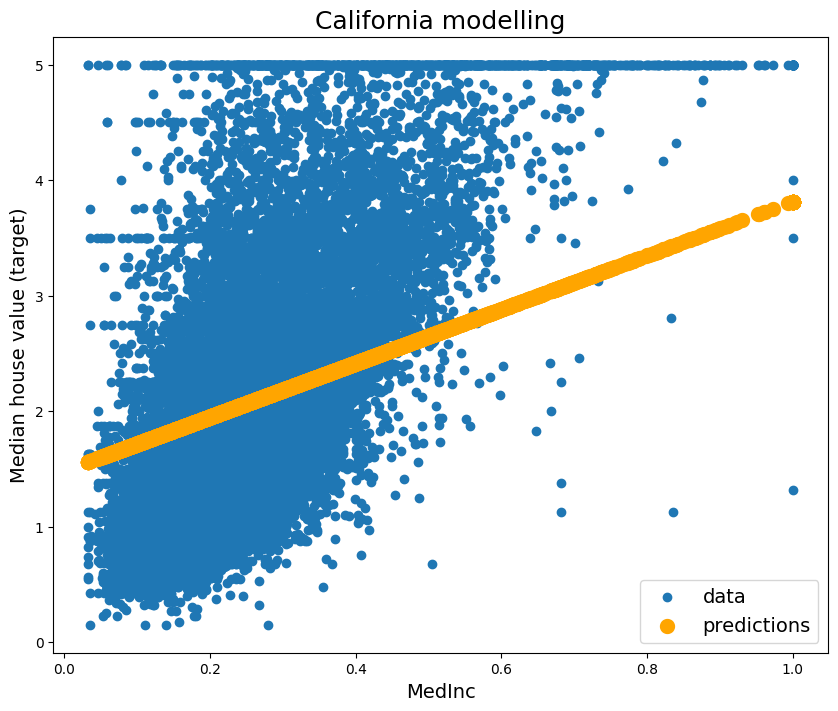

loss =  0.94986224
Done!


In [ ]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color="orange", linewidth=5, label="predictions")
        plt.xlabel("MedInc", fontsize=14)
        plt.ylabel("Median house value (target)", fontsize=14)
        plt.title("California modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.95:
            print("Done!")
            break


#### Разминка с градиентами

Дана функция: $$\large  f(x,y,z) = (x + y) * max(y, z)$$.

вычислите производные для $x, y, z$ в точке $(1, 2, 0)$ с помощью `tensor.backward()` и `tensor.grad`.

In [ ]:
# YOUR CODE

# Определяем x, y и z
x = torch.tensor(1., requires_grad=True)
y = torch.tensor(2., requires_grad=True)
z = torch.tensor(0., requires_grad=True)

# Зададим q как сумму x и y, также зададим f как произведение q на max(y,z)
q = x + y
f = q * torch.max(y,z)

# Вычисляем производную
f.backward()

# Печатаем значения
print("Derivative of f by x is: " + str(x.grad))
print("Derivative of f by y is: " + str(y.grad))
print("Derivative of f by z is: " + str(z.grad))

Derivative of f by x is: tensor(2.)
Derivative of f by y is: tensor(5.)
Derivative of f by z is: tensor(0.)


### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования (например, аугментации, о которых вы узнаете позже), нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


Давайте напишем такой сами, в качестве данных используя рандомные значения.

In [ ]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {"sample": torch.tensor(self.x[idx, :], dtype=torch.float), "target": self.y[idx]}

In [ ]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [ ]:
our_dataset = RandomDataset(x, y)

In [ ]:
our_dataset.__getitem__(1)

{'sample': tensor([0.2176, 0.7686, 0.3961, 0.0402, 0.6562]),
 'target': 0.993431319862626}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [ ]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [ ]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.3109, 0.7330, 0.3735, 0.9234, 0.0865],
        [0.2176, 0.7686, 0.3961, 0.0402, 0.6562],
        [0.8388, 0.8656, 0.3688, 0.6407, 0.5836],
        [0.8523, 0.4359, 0.6541, 0.7344, 0.8905]])
Target:
tensor([0.0412, 0.9934, 0.0792, 0.7455], dtype=torch.float64)


#### Как сделать нейросеть

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [ ]:
model = nn.Sequential()                   # создаем пустую модель, в которую будем добавлять слои
model.add_module("l1", nn.Linear(5, 30))  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())         # добавили функцию активации
model.add_module("l3", nn.Linear(30, 1))  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(
    nn.Linear(5, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

In [ ]:
y_pred = model(batch['sample'])  # получили предсказания модели

#### Как написать цикл обучения и отслеживать метрики

Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [ ]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train,
    batch_size=4,
    shuffle=True,
    num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val,
    batch_size=4,
    shuffle=False,
    num_workers=1
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.21MB/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 153kB/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.45MB/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.21MB/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



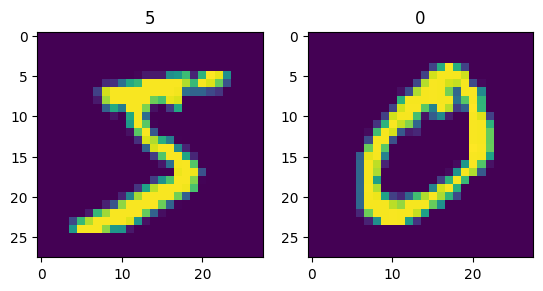

In [ ]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [ ]:
model = nn.Sequential(
    nn.Flatten(),             # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                # нелинейность
    nn.Linear(128, 10),       # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

Веса моделей хранятся в виде матриц и выглядят так:

In [ ]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[ 0.0080,  0.0144, -0.0306,  ..., -0.0094, -0.0006,  0.0087],
          [-0.0219, -0.0063, -0.0149,  ...,  0.0006,  0.0040, -0.0226],
          [ 0.0182, -0.0235, -0.0317,  ...,  0.0044, -0.0076, -0.0123],
          ...,
          [ 0.0082,  0.0240, -0.0075,  ...,  0.0247, -0.0110, -0.0276],
          [ 0.0251, -0.0081,  0.0301,  ..., -0.0021,  0.0104, -0.0243],
          [-0.0046, -0.0246,  0.0257,  ..., -0.0118, -0.0231,  0.0290]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([ 0.0342, -0.0086,  0.0346, -0.0185,  0.0326, -0.0044,  0.0309, -0.0027,
           0.0154, -0.0269,  0.0160,  0.0114,  0.0291, -0.0142, -0.0163, -0.0111,
           0.0002,  0.0150, -0.0208, -0.0170,  0.0022,  0.0265,  0.0278,  0.0017,
           0.0030,  0.0200, -0.0265,  0.0116, -0.0137,  0.0237,  0.0118, -0.0177,
          -0.0273, -0.0143, -0.0321, -0.0004, -0.0041,  0.0064, -0.0306,  0.0142,
           0.0182, -0.0208,  0.0233, 

Вместо того, чтобы каждый раз самим рисовать графики в `matplotlib`, мы будем _красиво_ трекать метрики в полуавтоматическом режиме в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся (это того стоит).

Note. Помимо этого инструмента есть другие альтернативы: Tensorboard (очень минималистичный, работает локально), MLFlow (менее красивый, но опенсорсный), Neptune (примерно как W&B).

In [ ]:
# !pip install wandb --upgrade --quiet
import wandb

# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
wandb.login()
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [ ]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):    # берем батч из трейн лоадера
        y_pred = model(x_train)                        # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)        # считаем лосс
        loss.backward()                                # считаем градиенты обратным проходом
        optimizer.step()                               # обновляем параметры сети
        optimizer.zero_grad()                          # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        val_loss = []                                  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():                          # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):  # берем батч из валидационного лоадера
                y_pred = model(x_val)                  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())          # добавляем в массив
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())

        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log({"mean val loss": np.mean(val_loss),
                   "mean val accuracy": np.mean(val_accuracy)})

        # печатаем метрики
        print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.11634531617164612, accuracy: 0.9653


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.08958490937948227, accuracy: 0.9741


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.08088270574808121, accuracy: 0.9761


### Дополнительные материалы:

* [Хорошая книга про pytorch](https://github.com/borninfreedom/DeepLearning/blob/master/Books/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](https://www.cs.toronto.edu/~duvenaud/talks/Johnson-Automatic-Differentiation.pdf)